In [1]:
library("ggplot2")

In [2]:
df = read.csv('mvtWeek1.csv')

In [3]:
head(df)

ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130
8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400


In [4]:
df$Date = as.Date(strptime(df$Date, "%m/%d/%y %H:%M"))

In [5]:
df$Month = months(df$Date)
df$WeekDays = weekdays(df$Date)

In [6]:
head(df)

ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,WeekDays
8951354,2012-12-31,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164,Dezember,Montag
8951141,2012-12-31,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130,Dezember,Montag
8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767,Dezember,Montag
8952223,2012-12-31,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773,Dezember,Montag
8951608,2012-12-31,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176,Dezember,Montag
8950793,2012-12-31,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400,Dezember,Montag


In [7]:
ncol(df)
nrow(df)
max(df$ID)
min(df$Beat)

[1] 13

[1] 191641

[1] 9181151

[1] 111

# How many observations have a LocationDescription value of ALLEY?

In [8]:
data.frame(table(df$LocationDescription=='ALLEY'))

Var1,Freq
FALSE,189333
TRUE,2308


In [9]:
summary(df$LocationDescription=='ALLEY')

   Mode   FALSE    TRUE    NA's 
logical  189333    2308       0 

In [10]:
groupy_month <-aggregate(df, by=list(df$Month), FUN = length)
groupy_month[which.max(groupy_month$Month),1]

[1] "Oktober"

In [11]:
descriptions <-(data.frame(table(df$LocationDescription)))
head(descriptions)

Var1,Freq
ABANDONED BUILDING,4
AIRPORT/AIRCRAFT,363
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,4
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1
AIRPORT EXTERIOR - NON-SECURE AREA,24
AIRPORT EXTERIOR - SECURE AREA,1


In [12]:
descriptions[which.max(descriptions$Freq),]

,Var1,Freq
72,STREET,156564


In [13]:
median(df$Date)

[1] "2006-05-21"

In [14]:
vehicles = df[grep('VEHICLE',df$LocationDescription),]
head(vehicles)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,WeekDays
22,8950318,2012-12-31,VEHICLE NON-COMMERCIAL,FALSE,FALSE,1923,19,6,2012,41.94974,-87.65426,Dezember,Montag
69,8950022,2012-12-30,VEHICLE NON-COMMERCIAL,FALSE,FALSE,1511,15,25,2012,41.89406,-87.77026,Dezember,Sonntag
78,8949135,2012-12-30,VEHICLE NON-COMMERCIAL,FALSE,FALSE,532,5,53,2012,41.66885,-87.61752,Dezember,Sonntag
85,8949144,2012-12-30,VEHICLE NON-COMMERCIAL,FALSE,FALSE,2533,25,25,2012,41.90424,-87.74986,Dezember,Sonntag
111,8948432,2012-12-29,VEHICLE NON-COMMERCIAL,FALSE,FALSE,923,9,63,2012,41.80008,-87.69505,Dezember,Samstag
125,8948191,2012-12-29,VEHICLE NON-COMMERCIAL,FALSE,FALSE,2223,22,73,2012,41.72647,-87.64199,Dezember,Samstag


In [15]:
class(vehicles)

[1] "data.frame"

In [16]:
vehicles_agg <-aggregate(df, by = list(df$Month), FUN = length)
vehicles_agg[order(-vehicles_agg$Year),][1,]

,Group.1,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,WeekDays
11,Oktober,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086,17086


In [17]:
df_ARREST_TRUE = df[df$Arrest=='TRUE',]

In [18]:
df_agg_arrested <-aggregate(df_ARREST_TRUE,by=list(df_ARREST_TRUE$Month), FUN = length)
df_agg_arrested[order(-df_agg_arrested$Year),]

,Group.1,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,WeekDays
5,Januar,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435
3,Dezember,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397
11,Oktober,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342,1342
2,August,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329
6,Juli,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324
9,März,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
10,November,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,April,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252
12,September,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248,1248
4,Februar,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238


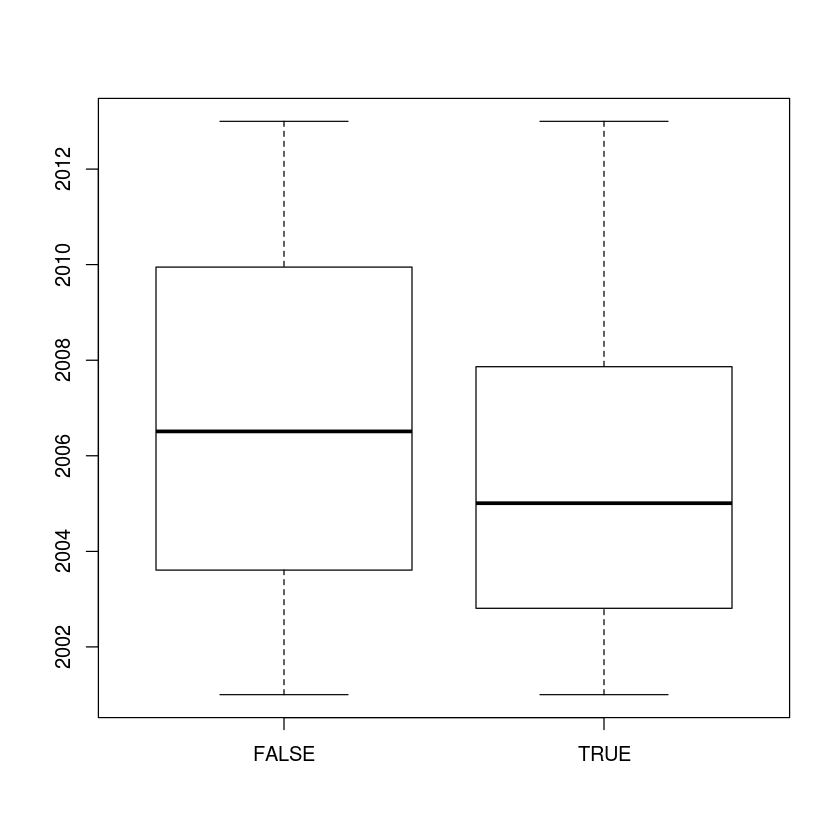

In [19]:
boxplot(df$Date ~ df$Arrest)

In [20]:
table(df$Month)


    April    August  Dezember   Februar    Januar      Juli      Juni       Mai 
    15280     16572     16426     13511     16047     16801     16002     16035 
     März  November   Oktober September 
    15758     16063     17086     16060 